# Precipitation at International Falls 1970-2010

* <a href=#section01>Load Precipitation Data for International Falls</a>
* <a href=#section02>Comparison of 1970-1999 to 2000-2010</a>
* <a href=#section03>Correlation of Precipitation and Rainy River Flow</a>

### Initialize Notebook

In [217]:
# Display graphics inline with the notebook
%matplotlib inline

# Standard Python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime

# use seaborn for statistical plotting
import seaborn as sns
sns.set_context('talk')

# Data directory
dir = '../data/'
img = '../images'

## <a name=section01></a>Load Precipitation Data for International Falls

Precipitation data for International Falls was obtained from the Global Historical Climatology network and stored as a Pandas data series in `./data/KINL.pkl` in standard metric units of mm. In the following cell reads the data series

In [218]:
KINL = pd.read_pickle(dir+'KINL.pkl')
KINL = KINL['1970':'2010']

### Annual Precipitation

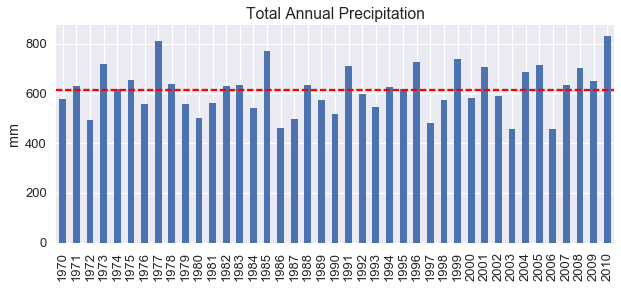

In [219]:
plt.figure(figsize=(10,4))
KINL.groupby(KINL.index.year).sum().plot(kind='bar')
plt.title('Total Annual Precipitation')
plt.ylabel('mm')

meanPrcp = KINL.groupby(KINL.index.year).sum().mean()
plt.plot(plt.xlim(),(meanPrcp,meanPrcp),'r--');

### Distribution of Annual Precipitation

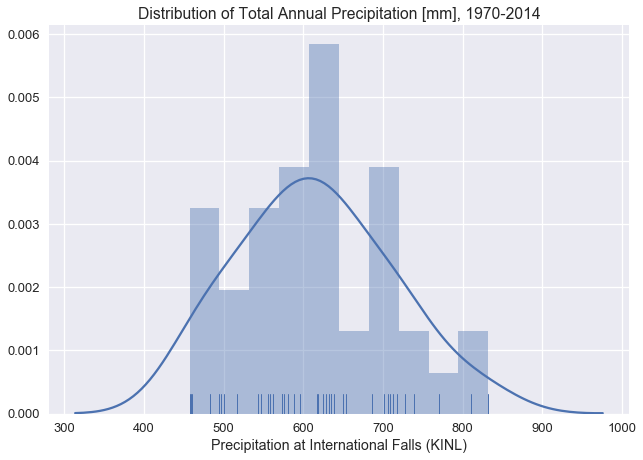

In [220]:
import warnings
warnings.simplefilter("ignore")
    
sns.distplot(KINL.groupby(KINL.index.year).sum(),bins=10,rug=True)
plt.title('Distribution of Total Annual Precipitation [mm], 1970-2014')

### Monthly Precipitation

(0, 110)

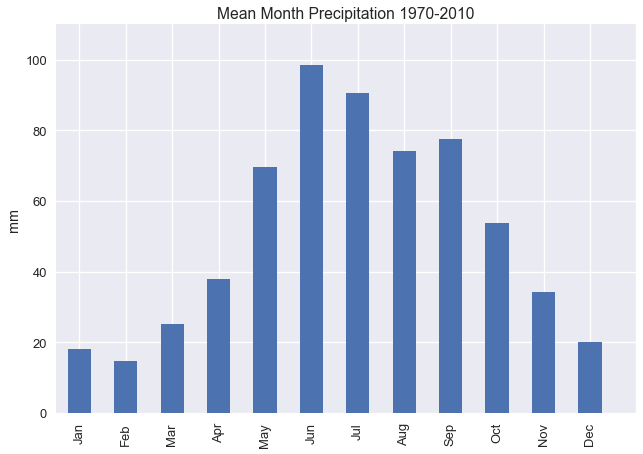

In [221]:
(KINL.groupby(KINL.index.month).sum()/41).plot(kind='bar')

plt.gca().set_xticks(range(0,13))
plt.gca().set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun',
                    'Jul','Aug','Sep','Oct','Nov','Dec'));
plt.title('Mean Month Precipitation 1970-2010')
plt.ylabel('mm')
plt.ylim(0,110)

### Distribution of Monthy Precipitation

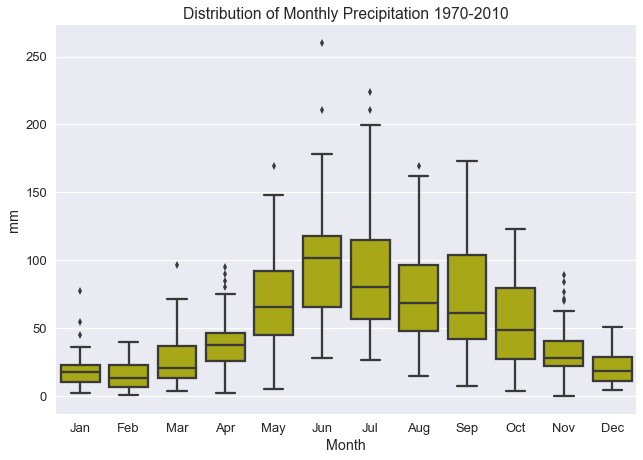

In [224]:
KINL = pd.read_pickle(dir+'KINL.pkl')
prcp = []
for (mo,yr),p in KINL.groupby([KINL.index.month,KINL.index.year]):
    prcp.append([yr,mo,p.sum()])
prcp = pd.DataFrame(prcp)
prcp.columns=['Year','Month','PRCP']

sns.boxplot(x='Month',y='PRCP',data=prcp,color='y')

plt.gca().set_xticks(np.arange(0.0,12.0,1.0))
plt.gca().set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun',
                    'Jul','Aug','Sep','Oct','Nov','Dec'));
plt.title('Distribution of Monthly Precipitation 1970-2010')
plt.ylabel('mm')

#plt.ylim(0,280)
#plt.gca().set_yticks(np.arange(0,280,25.4))
#plt.gca().set_yticklabels(np.arange(0,12,1))
#plt.ylabel('Inches')

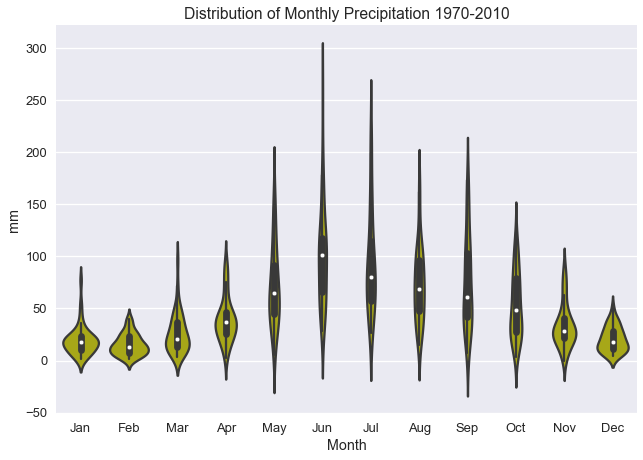

In [227]:
KINL = pd.read_pickle(dir+'KINL.pkl')

# create list of precip data consisting of year, month, and month precip
prcp = []
for (mo,yr),p in KINL.groupby([KINL.index.month,KINL.index.year]):
    prcp.append([yr,mo,p.sum()])
    
# convert to data frame
prcp = pd.DataFrame(prcp)
prcp.columns=['Year','Month','PRCP']

# create violinplots
sns.violinplot(x='Month',y='PRCP',data=prcp,color='y')
plt.gca().set_xticks(np.arange(0.0,12.0,1.0))
plt.gca().set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun',
                    'Jul','Aug','Sep','Oct','Nov','Dec'));
plt.title('Distribution of Monthly Precipitation 1970-2010')
plt.ylabel('mm')

## <a name=section02></a>Comparison of 1970-1999 to 2000-2010

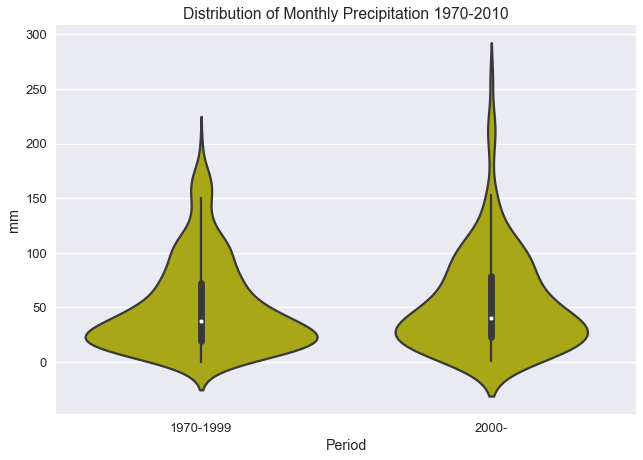

In [261]:
KINL = pd.read_pickle(dir+'KINL.pkl')

yrA = 1970
yrB = 2000

# create list of data entries with yr, mo, period, and monthly precip
prcp = []
for (mo,yr),p in KINL.groupby([KINL.index.month,KINL.index.year]):
    prcp.append([yr,mo,p.sum()])

# convert to data frame
prcp = pd.DataFrame(prcp)
prcp.columns=['Year','Month','PRCP']

# assign period
strA = "{0:d}-{1:d}".format(yrA,yrB-1)
strB = "{0:d}-".format(yrB)
prcp['Period'] = np.where(prcp['Year']<yrB,strA,strB)

# create violinplot
sns.violinplot(x='Period',y='PRCP',data=prcp,color='y')
plt.title('Distribution of Monthly Precipitation 1970-2010')
plt.ylabel('mm')

The average total annual precipitation appeared to increase from 2000-2010 compared to 1970-1999, but there is not enough data to establish statistical significance.

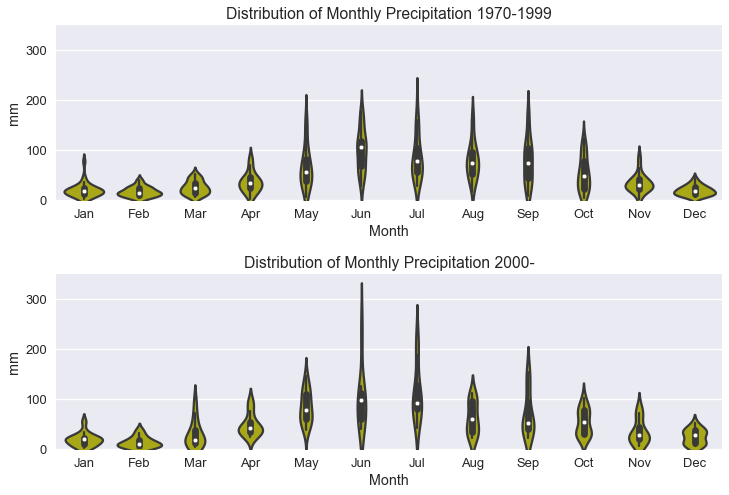

In [262]:
KINL = pd.read_pickle(dir+'KINL.pkl')

yrA = 1970
yrB = 2000

# create list of data entries with yr, mo, period, and monthly precip
prcp = []
for (mo,yr),p in KINL.groupby([KINL.index.month,KINL.index.year]):
    prcp.append([yr,mo,p.sum()])

# convert to data frame
prcp = pd.DataFrame(prcp)
prcp.columns=['Year','Month','PRCP']

# assign period
strA = "{0:d}-{1:d}".format(yrA,yrB-1)
strB = "{0:d}-".format(yrB)
prcp['Period'] = np.where(prcp['Year']<yrB,strA,strB)

# create violinplots
plt.subplot(2,1,1)
sns.violinplot(x='Month',y='PRCP',data=prcp[prcp['Period']=='1970-1999'],color='y')
plt.gca().set_xticks(np.arange(0.0,12.0,1.0))
plt.gca().set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun',
                    'Jul','Aug','Sep','Oct','Nov','Dec'));
plt.title('Distribution of Monthly Precipitation 1970-1999')
plt.ylabel('mm')
plt.ylim(0,350)

# create violinplots
plt.subplot(2,1,2)
sns.violinplot(x='Month',y='PRCP',data=prcp[prcp['Period']=='2000-'],color='y')
plt.gca().set_xticks(np.arange(0.0,12.0,1.0))
plt.gca().set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun',
                    'Jul','Aug','Sep','Oct','Nov','Dec'));
plt.title('Distribution of Monthly Precipitation 2000-')
plt.ylabel('mm')
plt.ylim(0,350)

plt.tight_layout()

## <a name=section03></a>Correlation of Precipitation and Rainy River Flow

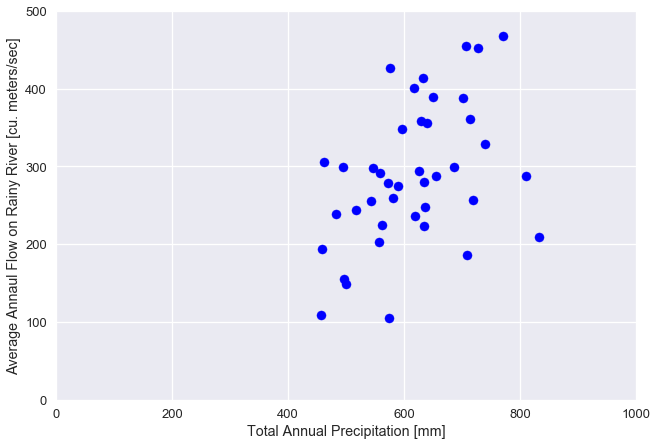

In [265]:
RR = pd.read_pickle(dir+'RR.pkl')
KINL = pd.read_pickle(dir+'KINL.pkl')

v  = [[RR[RR.index.year==yr].mean(),KINL[KINL.index.year==yr].sum()] 
 for yr in range(1970,2011)]
v = np.transpose(v)
plt.scatter(v[1],v[0],color='b')

plt.xlim(0,1000)
plt.ylim(0,500)
plt.ylabel('Average Annaul Flow on Rainy River [cu. meters/sec]')
plt.xlabel('Total Annual Precipitation [mm]')